### jupyter notebook Posting Test

오늘은 jupyter notebook으로 생성된 파일인 `ipynb`로 포스팅하는 것을 정리해볼까한다.
jupyter notebook파일을 바로 올리는 것으로 코드와 실행결과를 정리하기가 더욱 편해지지 않을까 싶다!




##### 1. 예제파일

우선 지금 글을 쓰고 있는 이 파일도 jupyter notebook파일로 실험하고 있다ㅎㅎ
간단한 파이썬 예제코드를 하나 작성해보자.


In [1]:
# 필요 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
y = np.random.randint(1,3,10)
x = np.random.randint(1,3,10)
print(y)
print(x)
print(y*x)

[1 2 1 2 2 1 1 1 1 2]
[1 1 2 1 1 2 2 1 2 1]
[1 2 2 2 2 2 2 1 2 2]


위와 같이 간단한 코드들과 결과들은 특별한 설정을 해줄 필요도 없이 바로 표시가 된다!

하지만 아래와 같이 결과를 이미지로 출력한 것들은 특별한 설정을 해주어야한다.

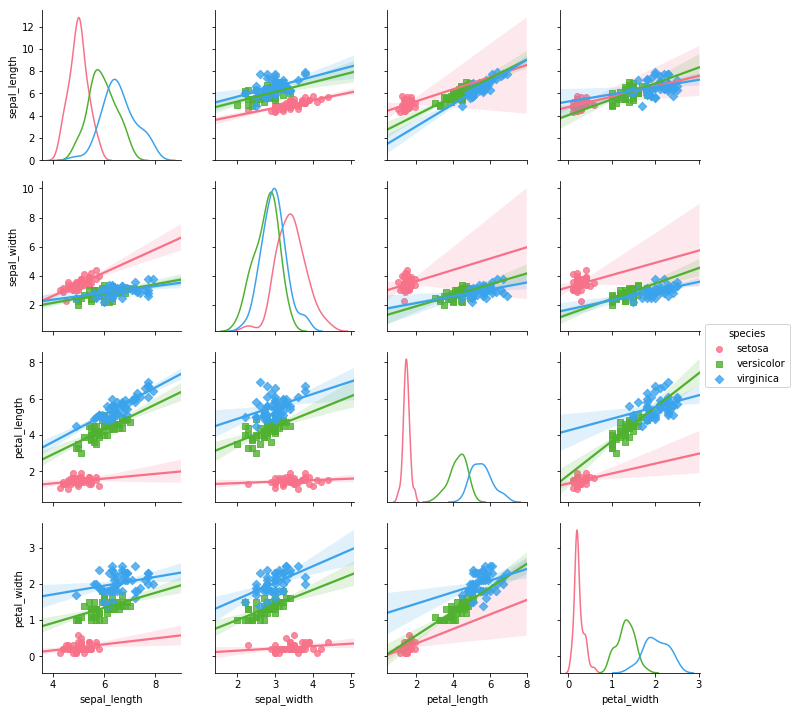

In [3]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", markers=["o", "s", "D"], kind="reg", diag_kind="kde", palette="husl")
plt.show()

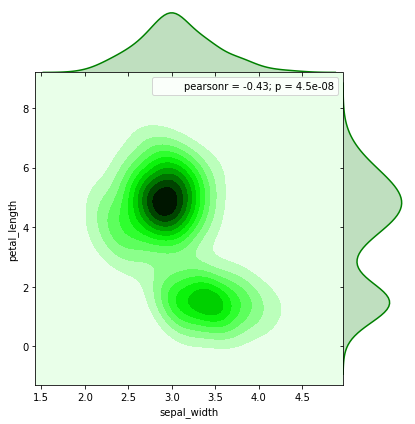

In [4]:
iris = sns.load_dataset("iris")
g = sns.jointplot("sepal_width", "petal_length", data=iris,
                  kind="kde", space=0, color="g")
plt.show()

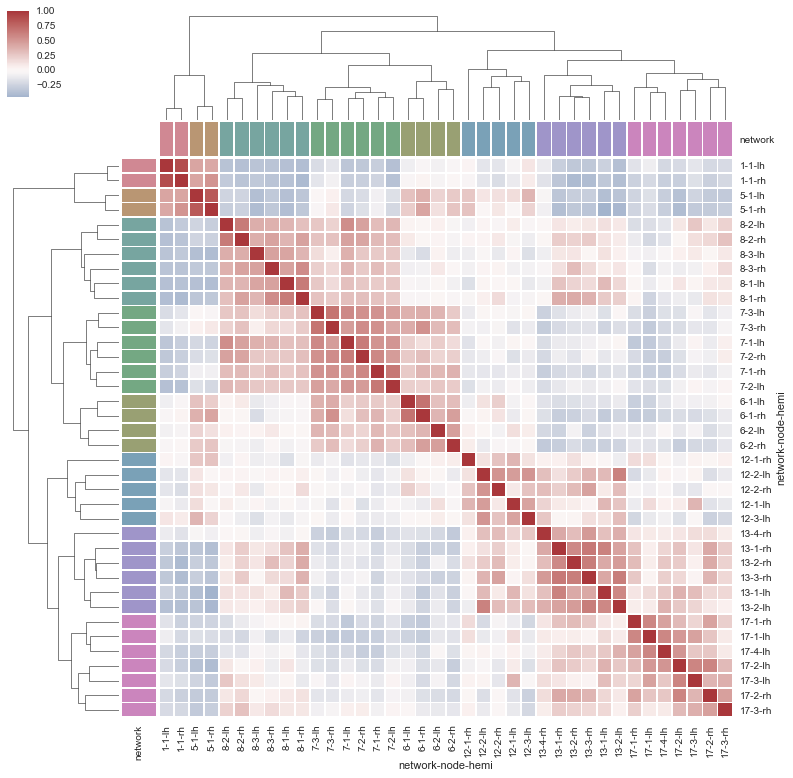

In [5]:
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))
plt.show()